In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import SLmod as SL
from numpy import pi as pi

#set plotting parameters
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [16, 8]

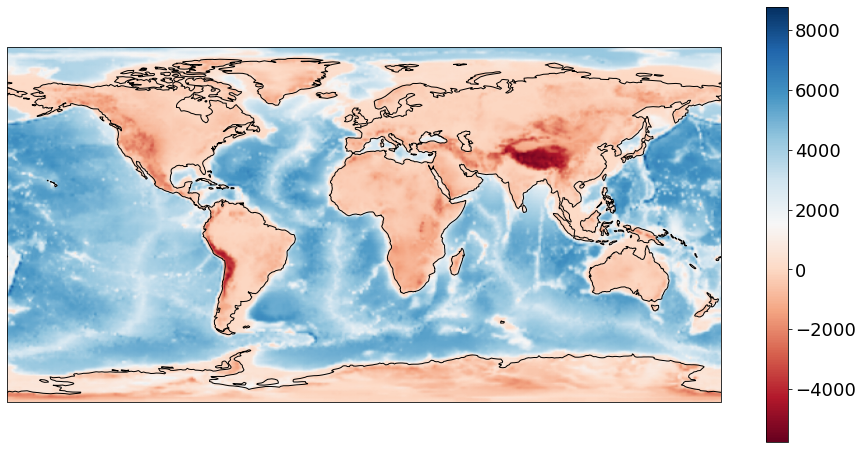

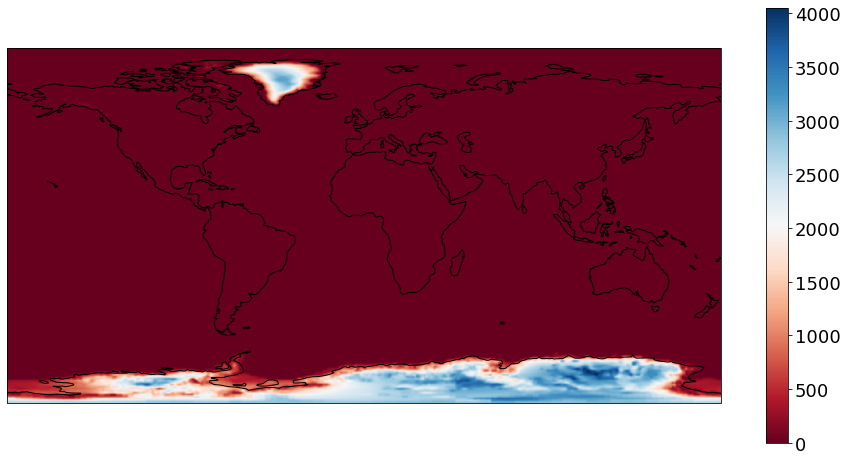

In [3]:
L=256
sl0,ice0 = SL.get_sl_ice_data(L)
SL.plot(sl0)
SL.plot(ice0)

In [4]:
C = SL.ocean_function(sl0,ice0)
A = SL.surface_integral(C)
A_earth = 4*pi*SL.b**2
print('fraction of surface which is ocean = ',A/A_earth)

fraction of surface which is ocean =  0.712960233719624


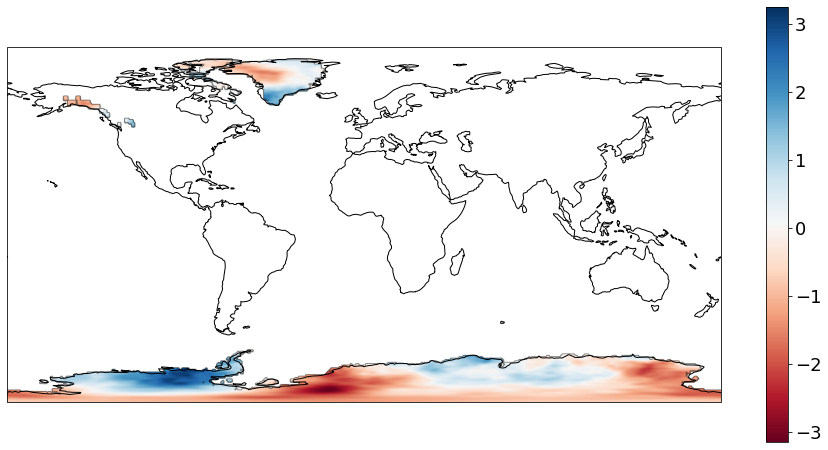

In [13]:
# set covariance for a random field
Q = SL.laplace_covariance(L,std = 1.,s = 2,mu = 0.1) 

# build a random melt geometry
ice = SL.random_field(Q)*SL.ice_mask(sl0,ice0,0.)

#ice = -1*SL.zero_southern_hemisphere(ice0)

# plot the result with suitable mask
ice_mask = SL.ice_mask(sl0,ice0)
SL.plot(ice_mask*ice)

iteration =  1 relative change =  0.02075230497363664
iteration =  2 relative change =  0.002511918970896548
iteration =  3 relative change =  0.0004209094593405217
iteration =  4 relative change =  8.310105021659265e-05
iteration =  5 relative change =  1.8083394636508892e-05
iteration =  6 relative change =  4.2436704066268935e-06
iteration =  7 relative change =  1.0687214219131599e-06
iteration =  8 relative change =  2.8727975153323515e-07


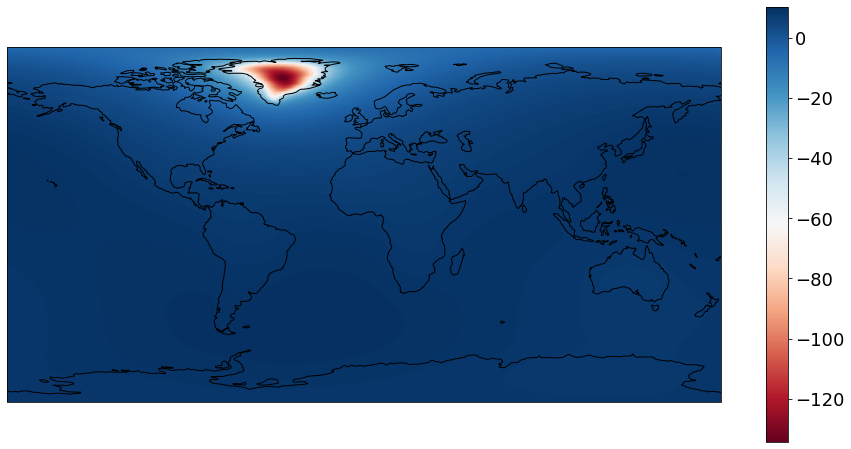

iteration =  1 relative change =  0.01989166448682606
iteration =  2 relative change =  0.0020655136983631895
iteration =  3 relative change =  0.0002851308611361314
iteration =  4 relative change =  4.40755417623122e-05
iteration =  5 relative change =  7.3051468926030705e-06
iteration =  6 relative change =  1.268433865152104e-06
iteration =  7 relative change =  2.2652603013305882e-07


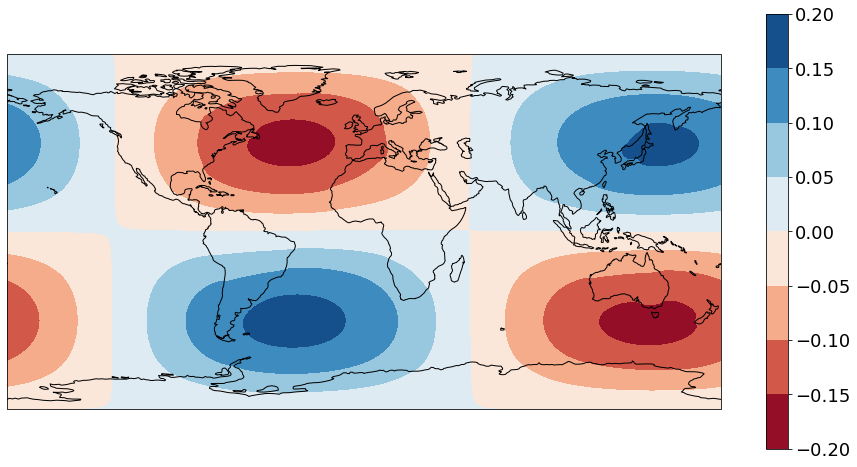

In [11]:
# set the direct load
zeta   = SL.rhoi*(1-C)*ice

# get uniform change
slu = SL.bathtub(C,zeta)

# solve the fingerprint problem
sl,_,_,_,_ = SL.fingerprint(C,zeta)
ocean_mask = SL.ocean_mask(sl0,ice0)
SL.plot(sl)

sl2,_,_,_,_ = SL.fingerprint(C,zeta,rotation=False)

SL.plot((sl-sl2)/slu,contour = True)


iteration =  1 relative change =  0.02251372127373803
iteration =  2 relative change =  0.0011942522977079774
iteration =  3 relative change =  0.00015460655884024893
iteration =  4 relative change =  3.021098712736499e-05
iteration =  5 relative change =  6.582967315686306e-06
iteration =  6 relative change =  1.5453545808320579e-06
iteration =  7 relative change =  3.8882406505599273e-07


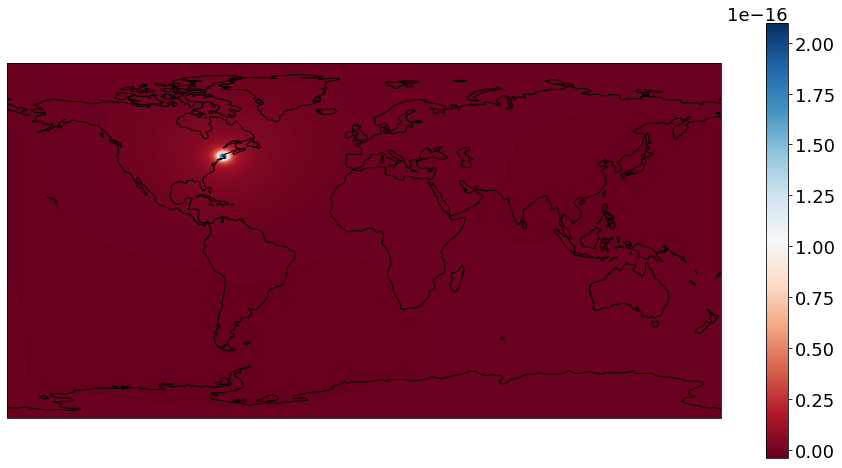

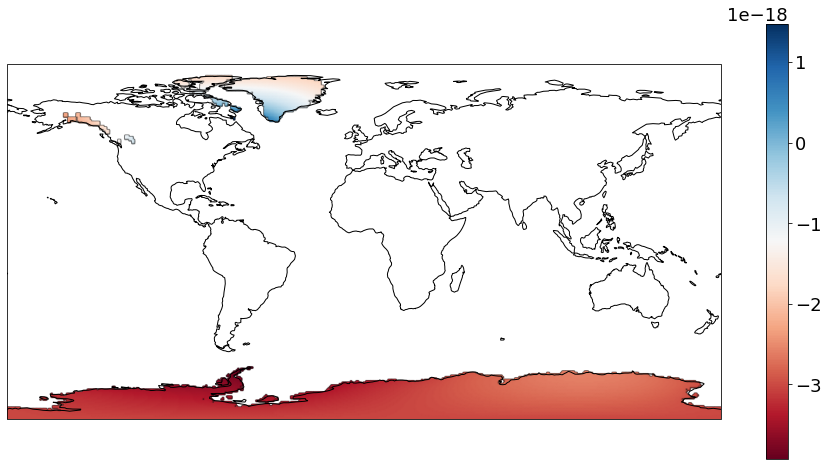

2.794545292522014 2.7945694051150554 8.628449539136919e-06


In [9]:
# set the observation point and set the adjoint loads
lats = np.zeros(1)
lons = np.zeros(1)
lats[0] =  42.5
lons[0] = -71.1

zeta_d   = SL.point_load(L,lats,lons,angle = 2)

# act the adjoint load on the sea level to get the observation
J =   SL.surface_integral(zeta_d*sl) 

sl_d,_,_,_,_ = SL.fingerprint(C,zeta_d)
SL.plot(sl_d)
SL.plot(ice_mask*sl_d)


# act the load on the adjoint sea level
J2 =   SL.surface_integral(zeta*sl_d)          

# compare the two values
print(J,J2,np.abs(J-J2)/np.abs(J))